In [1]:
import pandas as pd
import numpy as np

import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math 
import seaborn as sns
import matplotlib.colors as mcolors
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.formula.api import mixedlm
colors = list(mcolors.TABLEAU_COLORS.keys())*2



full_names = {
    'AU': 'Australia',
    'BR': 'Brazil',
    'CA': 'Canada',
    'FR': 'France',
    'DE': 'Germany',
    'IN': 'India',
    'IT': 'Italy',
    #'JP': 'Japan',
    #'KE': 'Kenia',
    'MX': 'Mexico',
    #'NG': 'Nigeria',
    'ES': 'Spain',
    'GB': 'United Kingdom',
    'US': 'United States',
    'DK': 'Denmark'
}

In [2]:
event_dicts = [{'country': 'AU',
  'start_md_1': '2020-03-27',
  'end_md_1': '2020-06-07',
  'start_md_2': np.nan},
 {'country': 'BR',
  'start_md_1': '2020-03-23',
  'end_md_1': '2020-08-09',
  'start_md_2': np.nan},
 {'country': 'CA',
  'start_md_1': '2020-03-19',
  'end_md_1': '2020-06-21',
  'start_md_2': '2020-10-12'},
 {'country': 'DE',
  'start_md_1': '2020-03-21',
  'end_md_1': '2020-05-09',
  'start_md_2': '2020-12-18'},
 {'country': 'DK',
  'start_md_1': '2020-03-17',
  'end_md_1': '2020-05-07',
  'start_md_2': np.nan},
 {'country': 'ES',
  'start_md_1': '2020-03-17',
  'end_md_1': '2020-06-14',
  'start_md_2': '2020-11-07'},
 {'country': 'FR',
  'start_md_1': '2020-03-18',
  'end_md_1': '2020-06-08',
  'start_md_2': '2020-11-01'},
 {'country': 'GB',
  'start_md_1': '2020-03-23',
  'end_md_1': '2020-08-03',
  'start_md_2': '2020-10-21'},
 {'country': 'IN',
  'start_md_1': '2020-03-24',
  'end_md_1': '2020-10-29',
  'start_md_2': np.nan},
 {'country': 'IT',
  'start_md_1': '2020-03-11',
  'end_md_1': '2020-06-06',
  'start_md_2': '2020-11-06'},
 {'country': 'JP',
  'start_md_1': '2020-04-12',
  'end_md_1': '2020-05-30',
  'start_md_2': np.nan},
 {'country': 'KE',
  'start_md_1': '2020-03-24',
  'end_md_1': '2020-10-04',
  'start_md_2': np.nan},
 {'country': 'MX',
  'start_md_1': '2020-03-25',
  'end_md_1': '2020-10-06',
  'start_md_2': np.nan},
 {'country': 'NG',
  'start_md_1': '2020-03-27',
  'end_md_1': '2020-08-09',
  'start_md_2': np.nan},
 {'country': 'US',
  'start_md_1': '2020-03-21',
  'end_md_1': '2020-06-11',
  'start_md_2': '2020-11-26'}]

In [3]:
df_events = pd.DataFrame(event_dicts)

In [4]:
df_events['start_md_1'] = pd.to_datetime(df_events['start_md_1'])
df_events['end_md_1'] = pd.to_datetime(df_events['end_md_1'])
df_events['start_md_2'] = pd.to_datetime(df_events['start_md_2'])

In [5]:
df_agg = pd.read_pickle('dk_new_df_agg_cats2.pickle')

In [6]:
df_agg

,country,category,volume_weekly_total,volume_weekly_total_l,volume_weekly_total_h,volume_percent_weekly_total
0,FR,dessert,2019-01-06 2039.955977 2019-01-13 2326.4...,2019-01-06 1835.859784 2019-01-13 2099.2...,2019-01-06 2268.661639 2019-01-13 2580.8...,2019-01-06 0.181580 2019-01-13 0.198787 ...
1,FR,soft drink,2019-01-06 121.671207 2019-01-13 129.083...,2019-01-06 114.391114 2019-01-13 121.331...,2019-01-06 129.498450 2019-01-13 137.439...,2019-01-06 0.010830 2019-01-13 0.011030 ...
2,FR,rice dish,2019-01-06 302.488958 2019-01-13 311.905...,2019-01-06 278.087672 2019-01-13 287.005...,2019-01-06 329.392011 2019-01-13 339.326...,2019-01-06 0.026925 2019-01-13 0.026651 ...
3,FR,soup,2019-01-06 401.235196 2019-01-13 366.711...,2019-01-06 369.185323 2019-01-13 337.439...,2019-01-06 436.562920 2019-01-13 399.011...,2019-01-06 0.035715 2019-01-13 0.031334 ...
4,FR,spice,2019-01-06 388.295133 2019-01-13 396.663...,2019-01-06 355.745896 2019-01-13 363.625...,2019-01-06 424.161427 2019-01-13 433.033...,2019-01-06 0.034563 2019-01-13 0.033893 ...
...,...,...,...,...,...,...
415,DK,cocktail,2019-01-06 34.420517 2019-01-13 32.986...,2019-01-06 31.581825 2019-01-13 30.403...,2019-01-06 37.815074 2019-01-13 36.177...,2019-01-06 0.021234 2019-01-13 0.020476 ...
416,DK,salad,2019-01-06 40.275451 2019-01-13 45.20149...,2019-01-06 37.351432 2019-01-13 42.03056...,2019-01-06 43.497477 2019-01-13 48.70743...,2019-01-06 0.024845 2019-01-13 0.028058 ...
417,DK,sandwich,2019-01-06 12.457403 2019-01-13 10.75246...,2019-01-06 11.985026 2019-01-13 10.36668...,2019-01-06 12.999977 2019-01-13 11.19724...,2019-01-06 0.007685 2019-01-13 0.006674 ...
418,DK,sausage,2019-01-06 10.073876 2019-01-13 10.67101...,2019-01-06 9.747320 2019-01-13 10.32124...,2019-01-06 10.449219 2019-01-13 11.06057...,2019-01-06 0.006214 2019-01-13 0.006624 ...


In [7]:
weeks_2019 = list(df_agg.iloc[0]['volume_percent_weekly_total'].index)[:52]
weeks_2020 = list(df_agg.iloc[0]['volume_percent_weekly_total'].index)[52:]

In [8]:
l = []
for cnt, row in df_agg.iterrows():
    start_md = df_events.loc[df_events['country'] == row['country']].iloc[0]['start_md_1']
    end_md = df_events.loc[df_events['country'] == row['country']].iloc[0]['end_md_1']
    start_md2 = df_events.loc[df_events['country'] == row['country']].iloc[0]['start_md_2']
    
    for week in zip(row['volume_percent_weekly_total'].index,row['volume_percent_weekly_total'].values,row['volume_percent_weekly_total'].values):
        
        entry = {}

        entry['country'] = row['country']
        entry['category'] = row['category']
        

        if week[0] in weeks_2020:
            date = pd.to_datetime(week[0])

            if type(start_md2)!=pd._libs.tslibs.nattype.NaTType and date > start_md2:
                continue

            entry['k'] = math.floor(((date - start_md).days +7) / 7)
            entry['volume_total'] = week[1]
            entry['volume_percent'] = week[2]
            entry['year'] = '2020'
            l.append(entry)

        elif week[0] in weeks_2019:
            date = pd.to_datetime(weeks_2020[weeks_2019.index(week[0])])
            
            if type(start_md2)!=pd._libs.tslibs.nattype.NaTType and date > start_md2:
                continue

            entry['k'] = math.floor(((date - start_md).days +7) / 7)
            entry['volume_total'] = week[1]
            entry['volume_percent'] = week[2]
            entry['year'] = '2019'
            l.append(entry)

        

In [9]:
df = pd.DataFrame(l)

In [81]:
((df.groupby('category')['volume_percent'].\
  agg('mean').sort_values(ascending = False))).apply(lambda x: round(x,3)*100)

category
dessert                         18.0
vegetable and legume             9.5
fruit                            9.0
wine, beer and liquor            8.1
pasta, pizza and noodle dish     7.3
spice                            4.1
sauce                            3.8
beef dish                        3.6
chicken dish                     3.4
rice dish                        3.3
cheese                           3.2
bread and flatbread              2.8
egg dish                         2.6
soup                             2.2
pork dish                        2.2
herb                             1.9
soft drink                       1.9
salad                            1.9
snack                            1.8
fish dish                        1.7
cocktail                         1.5
pie                              1.4
pastry and bakery product        1.3
potato dish                      1.2
sausage                          0.7
sandwich                         0.5
lamb dish                    

Text(0, 0.5, 'Volume share')

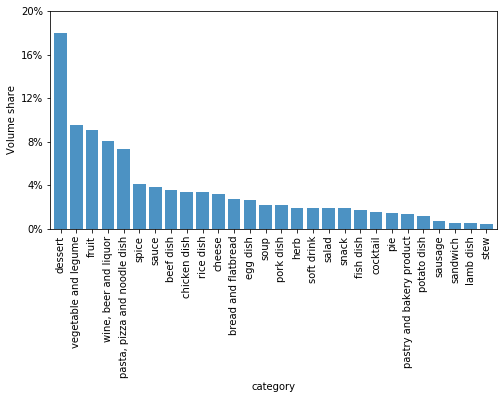

In [82]:
fig, axes = plt.subplots(1,1,figsize= (8,4))

((df.groupby('category')['volume_percent'].\
  agg('mean').sort_values(ascending = False))).plot.bar(alpha= 0.8, width = 0.8)

#plt.yscale('log', basey = 2)
plt.yticks([0,0.04,0.08,0.12,0.16,0.2],['0%','4%','8%',"12%",'16%','20%']);
plt.ylabel('Volume share')


## See similarity in fraction, 2019 between countries

In [119]:
l = []
for cnt, row in df_agg.loc[(df_agg['country'].isin(list(full_names.keys())))].iterrows():
    for week in zip(row['volume_percent_weekly_total'].index,row['volume_percent_weekly_total'].values,row['volume_percent_weekly_total'].values):
        
        entry = {}

        entry['country'] = row['country']
        entry['category'] = row['category']
        
        if week[0] in weeks_2020:
            entry['volume_percent'] = week[2]
            l.append(entry)

        

In [120]:
df_plot_2019= pd.DataFrame(l)

In [121]:
len(df_plot_2019)

17472

In [122]:
l = []
for x,gr1 in df_plot_2019.groupby('country'):
    for y,gr2 in gr1.groupby('category'):
        entry = {}
        entry['country'] = x
        entry['category'] = y
        entry['volume_percent'] = gr2['volume_percent'].mean()
        l.append(entry)
l = pd.DataFrame(l)

In [123]:
array_pca = []

for cnt,country in enumerate(list(full_names.keys())):    
    x = l.loc[l['country'] == country].sort_values(by='category', ascending = True)[['volume_percent']]
    array_pca.append(x['volume_percent'].values)

transformed = StandardScaler().fit_transform(np.array(array_pca))

In [124]:
from sklearn.manifold import MDS
embedding = MDS(n_components=2)
#pca = PCA(n_components=5)
transformed = embedding.fit_transform(transformed)

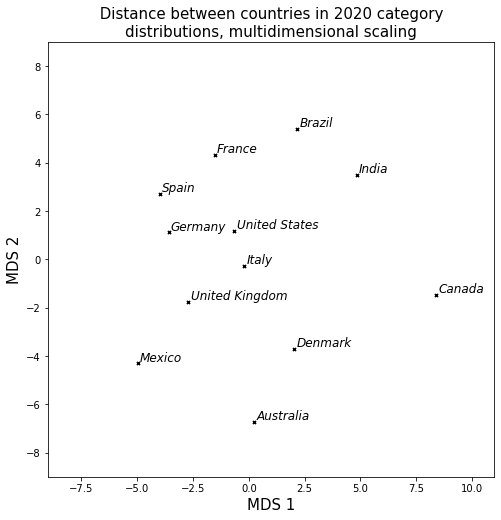

In [126]:
fig, axes = plt.subplots(1,1,figsize= (8,8))

for cnt,i in enumerate(transformed):
    plt.scatter(i[0],i[1], marker = 'x', s= 10, color = 'black')
    
    
    if countries_sorted[cnt] == 'US':
        plt.annotate(full_names[countries_sorted[cnt]],#+'\n'+\
                 #dict_max_mobility[countries_sorted[cnt]][0],
                (i[0]+0.1,i[1]+0.1), 
                 style = 'italic', fontsize = 12)
    else:
        plt.annotate(full_names[countries_sorted[cnt]], #+'\n'+\
                 #dict_max_mobility[countries_sorted[cnt]][0],
                     (i[0]+0.1,i[1]+0.1), 
                 style = 'italic', fontsize = 12)
        
    #plt.scatter(i[0],i[1],s = (dict_max_mobility[countries_sorted[cnt]][1]*3)**2, color = 'tab:blue', alpha = 0.2)
    
plt.ylim([-9,9])
plt.xlim([-9,11])
plt.xlabel('MDS 1', fontsize= 15)
           #+ str(100*embedding.explained_variance_ratio_[0])[:4]+"%)")
plt.ylabel('MDS 2', fontsize= 15)
           #str(100*embedding.explained_variance_ratio_[1])[:4]+"%)")
    
plt.title(' Distance between countries in 2020 category \ndistributions, multidimensional scaling', fontsize= 15);

In [11]:
#df.to_pickle('df_RDD_mobility_decrease')

### Check what is the highest bandwidth we can have

In [12]:
df.groupby('country').agg('k').max()

country
AU    40
BR    40
CA    30
DE    39
DK    41
ES    33
FR    33
GB    30
IN    40
IT    34
JP    38
KE    40
MX    40
NG    40
US    36
Name: k, dtype: int64

In [13]:
df.groupby('country').agg('k').min()

country
AU   -11
BR   -11
CA   -10
DE   -10
DK   -10
ES   -10
FR   -10
GB   -11
IN   -11
IT    -9
JP   -13
KE   -11
MX   -11
NG   -11
US   -10
Name: k, dtype: int64

In [14]:
df.groupby('country').agg('k').max().min()

30

In [15]:
df = df.loc[(df['k'] >= -30) & (df['k'] <= 30)]

In [16]:
# 61 weeks, 14 countries, 32 categories

(2*30+1)*12*32*2

46848

In [17]:
df = df.loc[(df['country'].isin(list(full_names.keys())))]

In [18]:
len(df)

27776

In [19]:
df['intervention_flag'] = df['k'].apply(lambda x: 1 if x >= 0 else 0)

In [20]:
df.head()

,country,category,k,volume_total,volume_percent,year,intervention_flag
0,FR,dessert,-10,0.181580,0.181580,2019,0
1,FR,dessert,-9,0.198787,0.198787,2019,0
2,FR,dessert,-8,0.215539,0.215539,2019,0
3,FR,dessert,-7,0.256282,0.256282,2019,0
4,FR,dessert,-6,0.237320,0.237320,2019,0


In [21]:
def generate_equation(order):
    if order == 'Cubic':
        eq = "volume_percent ~ intervention_flag*k*year + intervention_flag*np.power(k,2)*year + intervention_flag*np.power(k,3)*year"
    elif order == "Quadratic":
        eq = "volume_percent ~ intervention_flag*k*year + intervention_flag*np.power(k,2)*year"
    elif order == "Linear":
        eq = "volume_percent ~ intervention_flag*k*year"
    elif order == 'Constant':
        eq = "volume_percent ~ intervention_flag*year"
    return eq
    

In [22]:
def make_stars(val):
    if val<0.0001:
        return '****'
    elif val<0.001:
        return '***'
    elif val<0.01:
        return '**'
    elif val<0.05:
        return '*'
    else:
        return ''

In [23]:
def generate_equation_interactions(order):
    if order == 'Cubic':
        eq = "volume_percent ~ intervention_flag*k*year*C(country)*C(category) + intervention_flag*np.power(k,2)*year*C(country)*C(category) + intervention_flag*np.power(k,3)*year*C(country)*C(category)"
    elif order == "Quadratic":
        eq = "volume_percent ~ intervention_flag*k*year*C(country)*C(category) + intervention_flag*np.power(k,2)*year*C(country)*C(category)"
    elif order == "Linear":
        eq = "volume_percent ~ intervention_flag*k*year*C(country)*C(category)"
    elif order == 'Constant':
        eq = "volume_percent ~ intervention_flag*year*C(country)*C(category)"
    return eq
    

In [24]:
cats =  list(df['category'].unique())

In [25]:
k = 30

In [61]:
df_temp = df.loc[(df['k'] >= -k) & (df['k'] <= k)].copy()

df_temp['volume_percent'] = df_temp['volume_percent'].apply(np.log)

mod = smf.ols(generate_equation_interactions('Quadratic'), data = df_temp)

result_interactions = mod.fit(cov_type='hc0')

In [ ]:
result_interactions.summary()

In [62]:
sorted(cats)

['beef dish',
 'bread and flatbread',
 'cheese',
 'chicken dish',
 'cocktail',
 'dessert',
 'egg dish',
 'fish dish',
 'fruit',
 'herb',
 'lamb dish',
 'pasta, pizza and noodle dish',
 'pastry and bakery product',
 'pie',
 'pork dish',
 'potato dish',
 'rice dish',
 'salad',
 'sandwich',
 'sauce',
 'sausage',
 'snack',
 'soft drink',
 'soup',
 'spice',
 'stew',
 'vegetable and legume',
 'wine, beer and liquor']

In [63]:
default_country = 'AU'
default_category = 'beef dish'

In [64]:
alpha_baseline = 'intervention_flag:year[T.2020]'
beta_baseline = 'intervention_flag:k:year[T.2020]'
gamma_baseline = 'intervention_flag:np.power(k, 2):year[T.2020]'

In [65]:
def get_standard_error_sum(covariates):
    '''
    #95CI is approximated with +- 2 sum_variance_standard_error
    '''
    
    #get the variance covariance matrix
    vcov = result_interactions.cov_params()\
        .loc[covariates,covariates].values
    
    #calculate the sum of all pair wise covariances by summing up
    m_sum = np.sum(vcov)
    
    #variance of a sum of variables is the square root
    return np.sqrt((m_sum))

In [66]:
list_results = []



for country in full_names.keys():
    for c in cats:
        
        entry = {}
        entry['country']  = country
        entry['category'] = c
        
        suffix_country = (':C(country)[T.'+country+']')
        suffix_category = (':C(category)[T.'+c+']')
        
        if country == default_country and c == default_category:
            
            total_alpha = (result_interactions.params[alpha_baseline])
            total_alpha_error = (result_interactions.bse[alpha_baseline])
            
            total_beta = (result_interactions.params[beta_baseline])
            total_beta_error = (result_interactions.bse[beta_baseline])
            
            total_gamma = (result_interactions.params[gamma_baseline])
            total_gamma_error = (result_interactions.bse[gamma_baseline])
            
        elif country == default_country and c != default_category:
            
            total_alpha = (result_interactions.params[alpha_baseline]) \
                    + (result_interactions.params[alpha_baseline + suffix_category]) 
            total_alpha_error = (get_standard_error_sum([alpha_baseline, 
                                                         alpha_baseline + suffix_category]))
            
            total_beta = (result_interactions.params[beta_baseline]) \
                    + (result_interactions.params[beta_baseline + suffix_category]) 
            total_beta_error = (get_standard_error_sum([beta_baseline, 
                                                         beta_baseline + suffix_category]))
            
            total_gamma = (result_interactions.params[gamma_baseline]) \
                    + (result_interactions.params[gamma_baseline + suffix_category]) 
            total_gamma_error = (get_standard_error_sum([gamma_baseline, 
                                                         gamma_baseline + suffix_category]))

        elif country != default_country and c == default_category:
            
            total_alpha = (result_interactions.params[alpha_baseline]) \
                    + (result_interactions.params[alpha_baseline + suffix_country]) 
            total_alpha_error = (get_standard_error_sum([alpha_baseline,
                                                         alpha_baseline + suffix_country]))
            
            total_beta = (result_interactions.params[beta_baseline]) \
                    + (result_interactions.params[beta_baseline + suffix_country]) 
            total_beta_error = (get_standard_error_sum([beta_baseline,
                                                         beta_baseline + suffix_country]))
            
            total_gamma = (result_interactions.params[gamma_baseline]) \
                    + (result_interactions.params[gamma_baseline + suffix_country]) 
            total_gamma_error = (get_standard_error_sum([gamma_baseline,
                                                         gamma_baseline + suffix_country]))

        else:
            total_alpha = (result_interactions.params[alpha_baseline]) \
                    + (result_interactions.params[alpha_baseline + suffix_country]) \
                    + (result_interactions.params[alpha_baseline + suffix_category]) \
                    + (result_interactions.params[alpha_baseline + suffix_country + suffix_category])
            
            total_alpha_error = (get_standard_error_sum([alpha_baseline, 
                                                         alpha_baseline + suffix_category,
                                                         alpha_baseline + suffix_country, 
                                                         alpha_baseline + suffix_country + suffix_category]))
            
            total_beta = (result_interactions.params[beta_baseline]) \
                    + (result_interactions.params[beta_baseline + suffix_country]) \
                    + (result_interactions.params[beta_baseline + suffix_category]) \
                    + (result_interactions.params[beta_baseline + suffix_country + suffix_category])
            
            total_beta_error = (get_standard_error_sum([beta_baseline, 
                                                         beta_baseline + suffix_category,
                                                         beta_baseline + suffix_country, 
                                                         beta_baseline + suffix_country + suffix_category]))
            
            total_gamma = (result_interactions.params[gamma_baseline]) \
                    + (result_interactions.params[gamma_baseline + suffix_country]) \
                    + (result_interactions.params[gamma_baseline + suffix_category]) \
                    + (result_interactions.params[gamma_baseline + suffix_country + suffix_category])
            
            total_gamma_error = (get_standard_error_sum([gamma_baseline, 
                                                         gamma_baseline + suffix_category,
                                                         gamma_baseline + suffix_country, 
                                                         gamma_baseline + suffix_country + suffix_category]))
            
        entry['alpha'] = total_alpha
        entry['alpha_ste'] = total_alpha_error
        entry['beta'] = total_beta
        entry['beta_ste'] = total_beta_error
        entry['gamma'] = total_gamma
        entry['gamma_ste'] = total_gamma_error
        
        list_results.append(entry)

In [67]:
df_results = pd.DataFrame(list_results)

In [68]:
df_results

,country,category,alpha,alpha_ste,beta,beta_ste,gamma,gamma_ste
0,AU,dessert,0.130118,0.051726,0.007058,0.014348,0.000269,0.001049
1,AU,soft drink,-0.041419,0.093269,0.012868,0.035851,0.000331,0.002791
2,AU,rice dish,-0.139566,0.054694,0.008915,0.019272,-0.000674,0.001465
3,AU,soup,-0.422239,0.119714,-0.081162,0.035369,-0.003167,0.002587
4,AU,spice,-0.029503,0.034005,-0.031070,0.011619,-0.002321,0.000929
...,...,...,...,...,...,...,...,...
331,DK,cocktail,-0.399817,0.210942,0.061222,0.090971,0.008735,0.007645
332,DK,salad,-0.302168,0.204908,0.011629,0.079373,-0.002484,0.006605
333,DK,sandwich,-0.316553,0.241331,0.035380,0.081567,0.002825,0.007447
334,DK,sausage,-0.072003,0.259074,0.132951,0.089264,0.009602,0.007460


## 1. For all categories, show alpha in different countries

In [69]:
cats_sorted = list(df_results.groupby('category')['alpha'].agg('mean').sort_values(ascending = False).index)
countries_sorted = list(df_results.groupby('country')['alpha'].\
     agg('mean').sort_values(ascending = False).index)

In [70]:
sorterIndex = dict(zip(countries_sorted, range(len(countries_sorted))))

def sort_pd(key=None,reverse=False):
    def sorter(series):
        series_list = list(series)
        return [series_list.index(i) 
           for i in sorted(series_list,key=key,reverse=reverse)]
    return sorter

sort_by_custom_dict = sort_pd(key=sorterIndex.get)

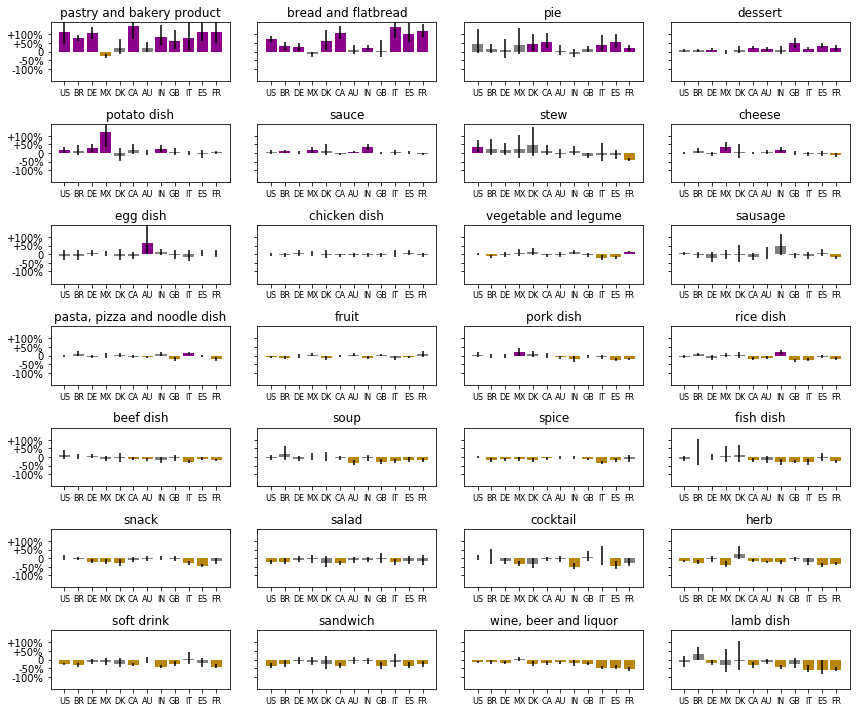

In [72]:
fig, axes = plt.subplots(7,4, figsize = (12,10), sharey = True)

for cnt,c in enumerate(cats_sorted):
    sbplt = axes[math.floor(cnt/4), cnt%4]
    x = df_results.loc[df_results['category'] == c].iloc[sort_by_custom_dict(df_results.loc[df_results['category'] == c]['country'])][['alpha','country','alpha_ste']]
    
    colors_bars = []
    for i in range(12):
        if x['alpha'].values[i]>0 and x['alpha'].values[i]-2*x['alpha_ste'].values[i]>0:
            colors_bars.append('darkmagenta')
        elif x['alpha'].values[i]<0 and x['alpha'].values[i]+2*x['alpha_ste'].values[i]<0:
            colors_bars.append('darkgoldenrod')
        else:
            colors_bars.append('gray')
            
    #sbplt.bar(range(12),x['alpha'].apply(lambda x: np.exp(x)-1), yerr = 2*x['alpha_ste'].apply(lambda x: np.exp(x)-1), color = colors_bars)
    
    sbplt.bar(range(12),x['alpha'].apply(lambda x: np.exp(x)-1),
            #here we convert errors back to linear scale
            yerr = np.array([x['alpha'].apply(lambda x: np.exp(x)-1) - (x['alpha']-2*x['alpha_ste']).apply(lambda x: np.exp(x)-1),
                            (x['alpha']+2*x['alpha_ste']).apply(lambda x: np.exp(x)-1) - x['alpha'].apply(lambda x: np.exp(x)-1)]), 
            color = colors_bars)
    
    sbplt.set_xticks(range(12))
    sbplt.set_xticklabels(x['country'], fontsize= 8)
    sbplt.set_title(c)
    
    sbplt.set_yticks([-1,-0.5,0,0.5,1])
    sbplt.set_yticklabels(["-100%","-50%","0","+50%","+100%"])
    sbplt.set_ylim([-1.7,1.7])

#fig.suptitle("α", position = (0.5, 1.05))
plt.tight_layout()

## 2. In all countries, show alpha in different cats

In [37]:
sorterIndex = dict(zip(cats_sorted, range(len(cats_sorted))))

def sort_pd(key=None,reverse=False):
    def sorter(series):
        series_list = list(series)
        return [series_list.index(i) 
           for i in sorted(series_list,key=key,reverse=reverse)]
    return sorter

sort_by_custom_dict = sort_pd(key=sorterIndex.get)

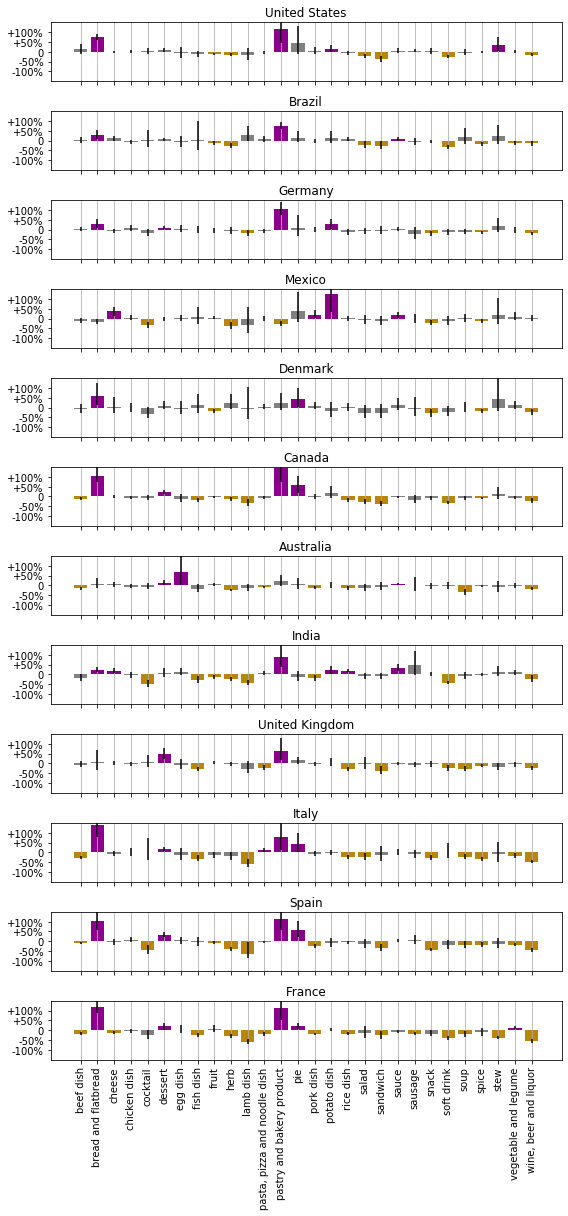

In [38]:
fig, axes = plt.subplots(12,1, figsize = (8,17), sharey = True)

for cnt,country in enumerate(countries_sorted):    
    sbplt = axes[cnt]
    
    #x = df_results.loc[df_results['country'] == country].iloc[sort_by_custom_dict(df_results.loc[df_results['country'] == country]['category'])][['alpha','category','alpha_ste']]
    x = df_results.loc[df_results['country'] == country].sort_values(by='category', ascending = True)[['alpha','category','alpha_ste']]
    
    colors_bars = []
    for i in range(28):
        if x['alpha'].values[i]>0 and x['alpha'].values[i]-2*x['alpha_ste'].values[i]>0:
            colors_bars.append('darkmagenta')
        elif x['alpha'].values[i]<0 and x['alpha'].values[i]+2*x['alpha_ste'].values[i]<0:
            colors_bars.append('darkgoldenrod')
        else:
            colors_bars.append('gray')
            
            
    sbplt.bar(range(28),x['alpha'].apply(lambda x: np.exp(x)-1),
            #here we convert errors back to linear scale
            yerr = np.array([x['alpha'].apply(lambda x: np.exp(x)-1) - (x['alpha']-2*x['alpha_ste']).apply(lambda x: np.exp(x)-1),
                            (x['alpha']+2*x['alpha_ste']).apply(lambda x: np.exp(x)-1) - x['alpha'].apply(lambda x: np.exp(x)-1)]), 
            color = colors_bars
           )
    
    sbplt.set_yticks([-1,-0.5,0,0.5,1])
    sbplt.set_yticklabels(["-100%","-50%","0","+50%","+100%"])
    sbplt.set_ylim([-1.5,1.5])

    sbplt.set_xticks(range(28))
    
    if cnt == 11:
        sbplt.set_xticklabels(x['category'], fontsize= 10, rotation = 90)
    else:
        sbplt.set_xticklabels([])

    sbplt.set_title(full_names[country])

    #sbplt.set_yticks([-1,0,1,2,3])
    #sbplt.set_yticklabels(["-100%","0","+100%","+200%","+300%"])
    #sbplt.set_ylim([-1,4])
    
    sbplt.grid(axis = 'x')


#fig.suptitle("α", position = (0.5, 1))
plt.tight_layout()

In [39]:
sorterIndex = dict(zip(cats_sorted, range(len(cats_sorted))))

def sort_pd(key=None,reverse=False):
    def sorter(series):
        series_list = list(series)
        return [series_list.index(i) 
           for i in sorted(series_list,key=key,reverse=reverse)]
    return sorter

sort_by_custom_dict = sort_pd(key=sorterIndex.get)

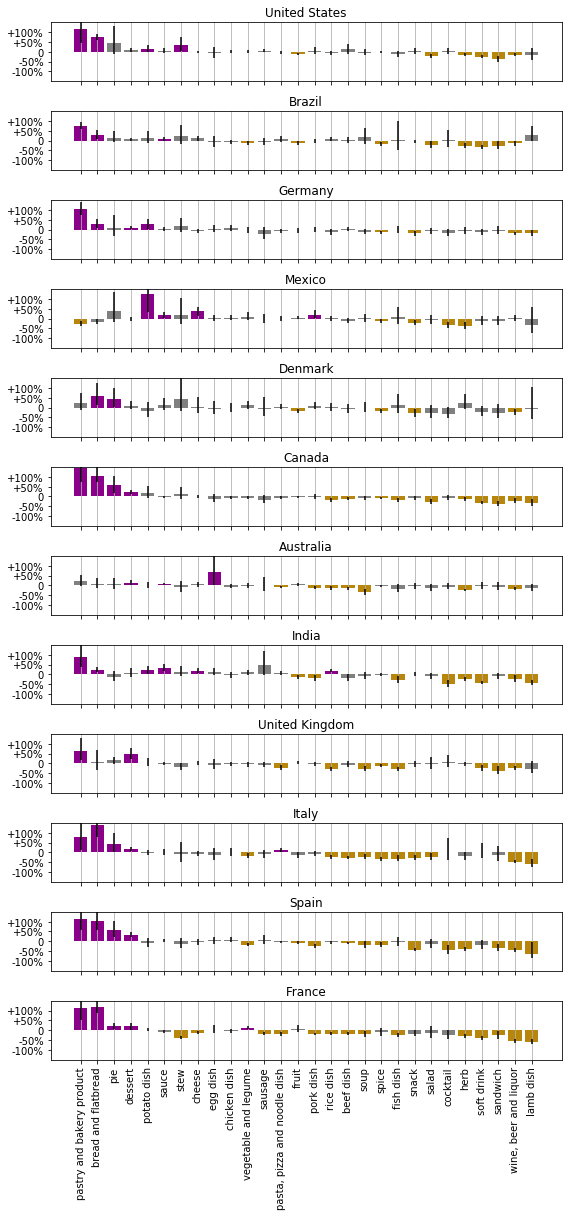

In [41]:
fig, axes = plt.subplots(12,1, figsize = (8,17), sharey = True)

for cnt,country in enumerate(countries_sorted):    
    sbplt = axes[cnt]
    
    x = df_results.loc[df_results['country'] == country].iloc[sort_by_custom_dict(df_results.loc[df_results['country'] == country]['category'])][['alpha','category','alpha_ste']]
    #x = df_results.loc[df_results['country'] == country].sort_values(by='category', ascending = True)[['alpha','category','alpha_ste']]
    
    colors_bars = []
    for i in range(28):
        if x['alpha'].values[i]>0 and x['alpha'].values[i]-2*x['alpha_ste'].values[i]>0:
            colors_bars.append('darkmagenta')
        elif x['alpha'].values[i]<0 and x['alpha'].values[i]+2*x['alpha_ste'].values[i]<0:
            colors_bars.append('darkgoldenrod')
        else:
            colors_bars.append('gray')
            
            
    sbplt.bar(range(28),x['alpha'].apply(lambda x: np.exp(x)-1),
            #here we convert errors back to linear scale
            yerr = np.array([x['alpha'].apply(lambda x: np.exp(x)-1) - (x['alpha']-2*x['alpha_ste']).apply(lambda x: np.exp(x)-1),
                            (x['alpha']+2*x['alpha_ste']).apply(lambda x: np.exp(x)-1) - x['alpha'].apply(lambda x: np.exp(x)-1)]), 
            color = colors_bars
           )
    
    sbplt.set_yticks([-1,-0.5,0,0.5,1])
    sbplt.set_yticklabels(["-100%","-50%","0","+50%","+100%"])
    sbplt.set_ylim([-1.5,1.5])

    sbplt.set_xticks(range(28))
    
    if cnt == 11:
        sbplt.set_xticklabels(x['category'], fontsize= 10, rotation = 90)
    else:
        sbplt.set_xticklabels([])

    sbplt.set_title(full_names[country])


    
    sbplt.grid(axis = 'x')


#fig.suptitle("α", position = (0.5, 1))
plt.tight_layout()

In [42]:
dict_max_mobility = {'AU': ("2020-04-15", 21.714285714285715),
    'BR': ("2020-03-27",  20.857142857142858),
    'CA': ("2020-04-15",  23.285714285714285),
    'FR': ("2020-03-29",  30.428571428571427),
    'DE': ("2020-04-15",  17.428571428571427),
    'IN': ("2020-04-13",  29.142857142857142),
    'IT': ("2020-03-30",  31.571428571428573),
    'MX': ("2020-04-14",  21.142857142857142),
    'ES': ("2020-04-12",  31.428571428571427),
    'GB': ("2020-04-15",  25.714285714285715),
    'US': ("2020-04-09",  19.428571428571427),
    'DK': ("2020-03-23",  16.857142857142858)}

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [43]:
array_pca = []

for cnt,country in enumerate(countries_sorted):    
    x = df_results.loc[df_results['country'] == country].sort_values(by='category', ascending = True)[['alpha','category','alpha_ste']]
    array_pca.append(x['alpha'].values)

transformed = StandardScaler().fit_transform(np.array(array_pca))

In [44]:
pca = PCA(n_components=2)
transformed = pca.fit_transform(transformed , 2)

Text(0, 0.5, 'Second principal component (17.2%)')

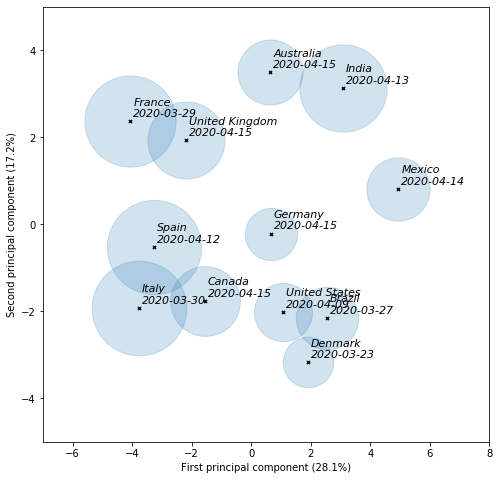

In [45]:
fig, axes = plt.subplots(1,1,figsize= (8,8))

for cnt,i in enumerate(transformed):
    plt.scatter(i[0],i[1], marker = 'x', s= 10, color = 'black')
    
    

    plt.annotate(full_names[countries_sorted[cnt]]+'\n'+\
                 dict_max_mobility[countries_sorted[cnt]][0],(i[0]+0.1,i[1]+0.1), 
                 style = 'italic', fontsize = 11)
        
    plt.scatter(i[0],i[1],s = (dict_max_mobility[countries_sorted[cnt]][1]*3)**2, color = 'tab:blue', alpha = 0.2)
    
plt.ylim([-5,5])
plt.xlim([-7,8])
plt.xlabel('First principal component (' + str(100*pca.explained_variance_ratio_[0])[:4]+"%)")
plt.ylabel('Second principal component ('+ str(100*pca.explained_variance_ratio_[1])[:4]+"%)")

In [46]:
def generate_equation_pulled_interactions(order):
    if order == 'Cubic':
        eq = "volume_percent ~ intervention_flag*k*year*C(category) + intervention_flag*np.power(k,2)*year*C(category) + intervention_flag*np.power(k,3)*year*C(category)"
    elif order == "Quadratic":
        eq = "volume_percent ~ intervention_flag*k*year*C(category) + intervention_flag*np.power(k,2)*year*C(category)"
    elif order == "Linear":
        eq = "volume_percent ~ intervention_flag*k*year*C(category)"
    elif order == 'Constant':
        eq = "volume_percent ~ intervention_flag*year*C(category)"
    return eq
    

In [47]:
df_temp = df.loc[(df['k'] >= -k) & (df['k'] <= k)].copy()

df_temp['volume_percent'] = df_temp['volume_percent'].apply(np.log)

mod_pulled = smf.ols(generate_equation_pulled_interactions('Quadratic'), data = df_temp)

result_interactions_pulled = mod.fit(cov_type='hc0')

In [48]:
default_category = 'beef dish'

In [49]:
k

30

In [50]:
alpha_baseline = 'intervention_flag:year[T.2020]'
beta_baseline = 'intervention_flag:k:year[T.2020]'
gamma_baseline = 'intervention_flag:np.power(k, 2):year[T.2020]'

In [51]:
list_results = []


for c in cats:

    entry = {}
    entry['category'] = c

    suffix_category = (':C(category)[T.'+c+']')

    if c == default_category:

        total_alpha = (result_interactions.params[alpha_baseline])
        total_alpha_error = (result_interactions.bse[alpha_baseline])

        total_beta = (result_interactions.params[beta_baseline])
        total_beta_error = (result_interactions.bse[beta_baseline])

        total_gamma = (result_interactions.params[gamma_baseline])
        total_gamma_error = (result_interactions.bse[gamma_baseline])

    elif c!= default_category:

        total_alpha = (result_interactions.params[alpha_baseline]) \
                + (result_interactions.params[alpha_baseline + suffix_category]) 
        total_alpha_error = (get_standard_error_sum([alpha_baseline, 
                                                     alpha_baseline + suffix_category]))

        total_beta = (result_interactions.params[beta_baseline]) \
                + (result_interactions.params[beta_baseline + suffix_category]) 
        total_beta_error = (get_standard_error_sum([beta_baseline, 
                                                     beta_baseline + suffix_category]))

        total_gamma = (result_interactions.params[gamma_baseline]) \
                + (result_interactions.params[gamma_baseline + suffix_category]) 
        total_gamma_error = (get_standard_error_sum([gamma_baseline, 
                                                     gamma_baseline + suffix_category]))


    entry['alpha'] = total_alpha
    entry['alpha_ste'] = total_alpha_error
    entry['beta'] = total_beta
    entry['beta_ste'] = total_beta_error
    entry['gamma'] = total_gamma
    entry['gamma_ste'] = total_gamma_error

    list_results.append(entry)

In [52]:
df_results = pd.DataFrame(list_results)

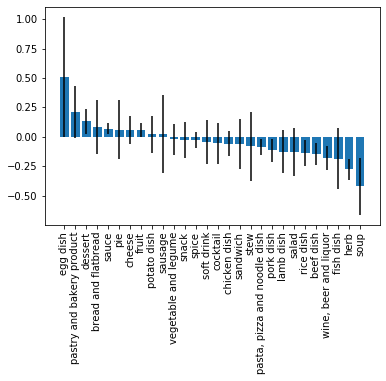

In [53]:
plt.bar(range(28),df_results.sort_values(by = 'alpha', ascending= False)['alpha'], 
        yerr = 2*df_results.sort_values(by = 'alpha', ascending= False)['alpha_ste'])

plt.xticks(range(28),df_results.sort_values(by = 'alpha', ascending= False)['category'], rotation = 90);